<a href="https://colab.research.google.com/github/ADHITHYA-P-T/Python-and-Machine-Learning/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits=load_digits()

In [2]:
print('Image Data Shape',digits.data.shape)

Image Data Shape (1797, 64)


In [3]:
print('Label Data Shape',digits.target.shape)

Label Data Shape (1797,)


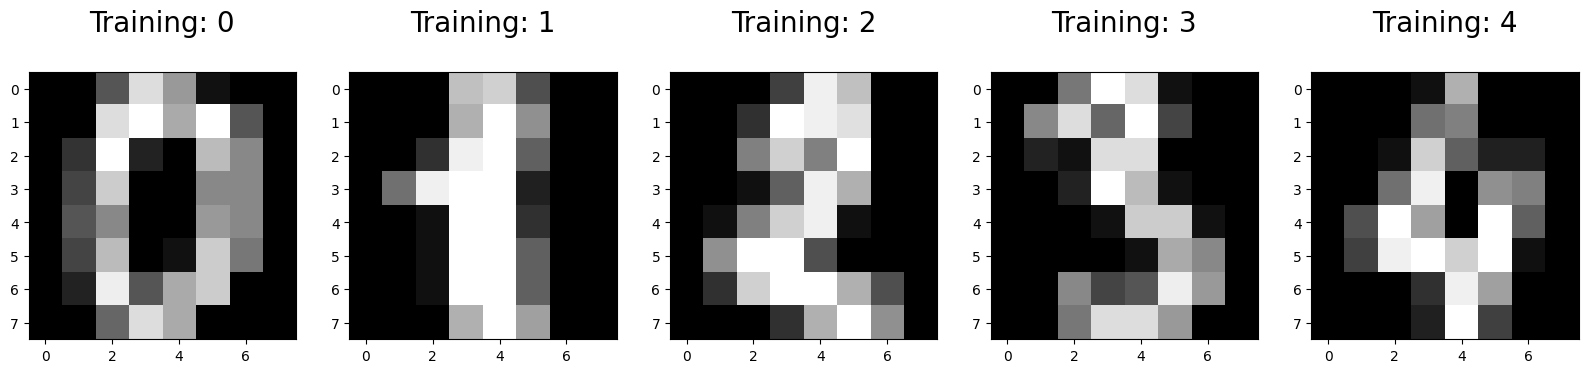

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index,(image,label) in  enumerate(zip(digits.data[0:5],digits.target[0:5])):

    plt.subplot(1,5,index + 1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title('Training: %i\n'%label,fontsize=20)

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.23,random_state=2)

In [7]:
print(x_train.shape)

(1383, 64)


In [8]:
print(y_train.shape)

(1383,)


In [9]:
print(x_test.shape)

(414, 64)


In [10]:
print(y_test.shape)

(414,)


In [11]:
from sklearn.linear_model import LogisticRegression



In [12]:

logisticRegr=LogisticRegression()
logisticRegr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
#Returns a Numpy Array
#Predict for One Observation(image)
print(logisticRegr.predict(x_test[0].reshape(1,-1)))

[4]


In [14]:
logisticRegr.predict(x_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [15]:
predictions=logisticRegr.predict(x_test)

In [16]:
score=logisticRegr.score(x_test,y_test)
print(score)

0.9516908212560387


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn import metrics

In [18]:
cm=metrics.confusion_matrix(y_test,predictions)
print(cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


Text(0.5, 1.0, 'Accuracy Score :0.9516908212560387')

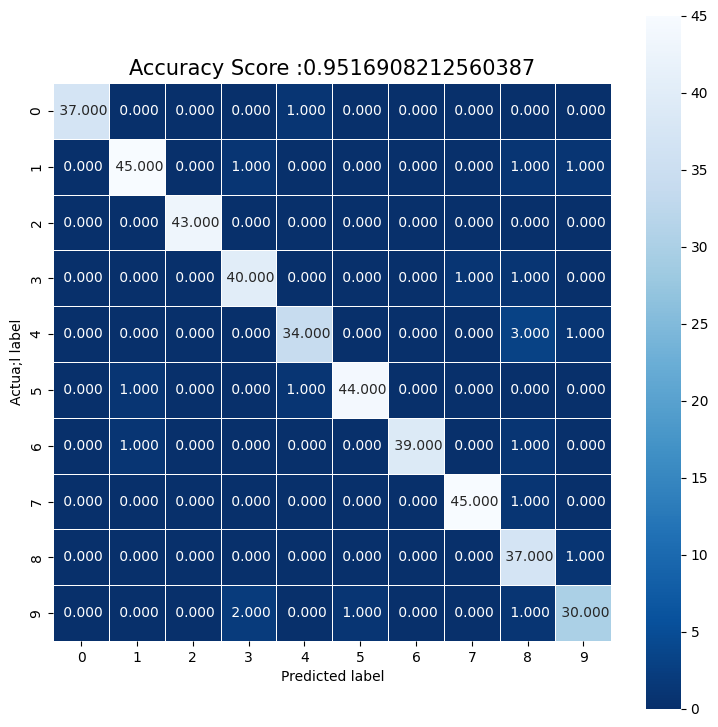

In [19]:
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt=" .3f",linewidth=.5,square=True,cmap='Blues_r');
plt.ylabel('Actua;l label');
plt.xlabel('Predicted label');
all_sample_title='Accuracy Score :{0}'.format(score)
plt.title(all_sample_title, size=15)

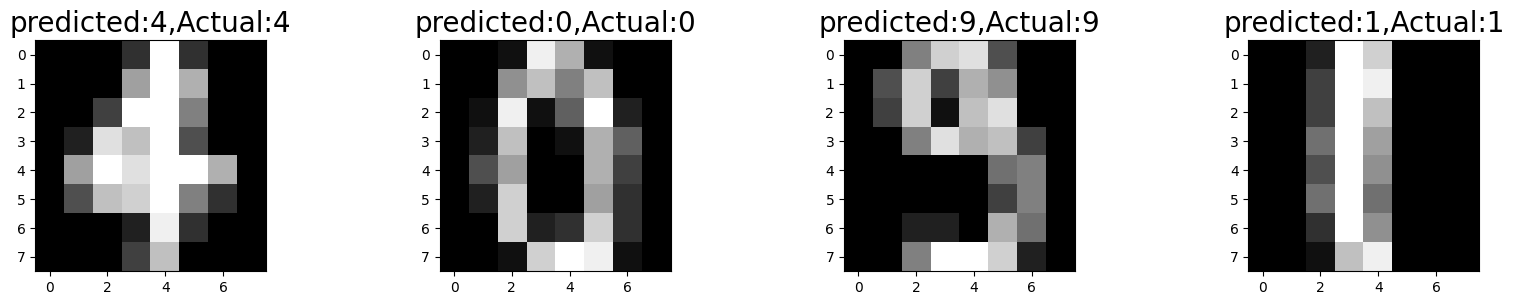

In [20]:
index=0
classifiedIndex=[]
for predict , actual in zip(predictions, y_test):
    if predict==actual:
        classifiedIndex.append(index)
    index+=1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4,plotIndex + 1)
    plt.imshow(np.reshape(x_test[wrong],(8,8)),cmap=plt.cm.gray)
    plt.title("predicted:{},Actual:{}".format(predictions[wrong],y_test[wrong]),fontsize=20)